<a href="https://colab.research.google.com/github/Prajwayne/testGit/blob/master/High_accuracy_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression


In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('coursework_fintech.csv', index_col=0)

In [3]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

Heat map of correlation 

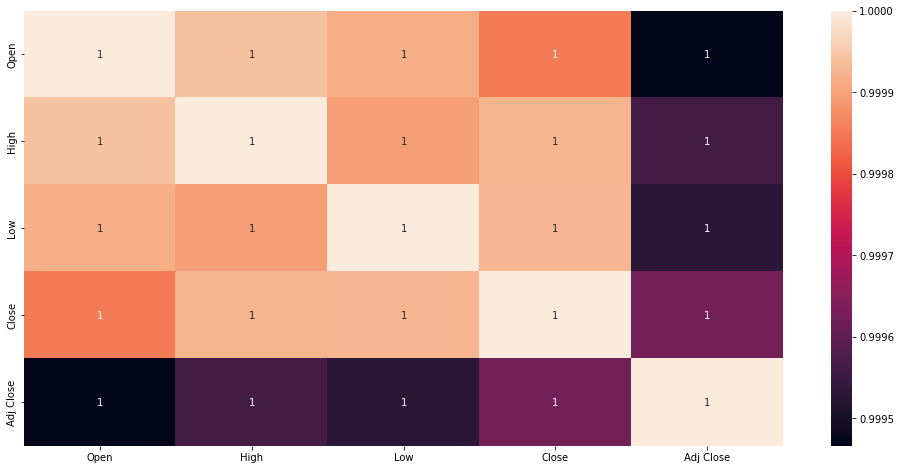

In [4]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [89]:
list_of_features = ['Open','High','Low','Close']
X = data[list_of_features]
y = data['Adj Close']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [102]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

In [103]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
# def plotCoefficients(model):
#     """
#         Plots sorted coefficient values of the model
#     """
    
#     coefs = pd.DataFrame(model.coef_, X_train.columns)
#     coefs.columns = ["coef"]
#     coefs["abs"] = coefs.coef.apply(np.abs)
#     coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
#     plt.figure(figsize=(15, 7))
#     coefs.coef.plot(kind='bar')
#     plt.grid(True, axis='y')
#     plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [104]:
import numpy as np
from sklearn.dummy import DummyRegressor

Baseline 1
SKlearn Dummy 

In [74]:
dummy_regr = DummyRegressor(strategy="mean")

In [75]:
dummy_regr.fit(X_train,y_train)

DummyRegressor()

In [76]:
dummy_regr.predict(X_test)

array([19.12358815, 19.12358815, 19.12358815, ..., 19.12358815,
       19.12358815, 19.12358815])

In [77]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dummy_regr, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -0.16 %
Standard Deviation: 0.14 %


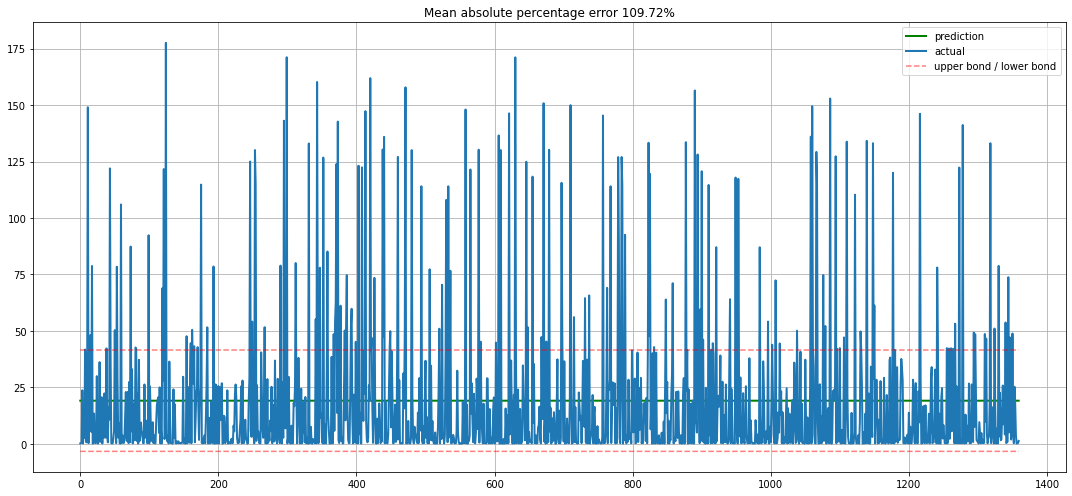

In [105]:
plotModelResults(dummy_regr, X_train, X_test, plot_intervals=True)

Linear regression 

In [106]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()


In [107]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_test

In [108]:
lin_pred=lin_model.predict(X_test)
# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (11,6)
# plt.plot(lin_pred,label='Linear_Regression_Predictions')
# plt.plot(y_test,label='Actual Sales')
# plt.legend(loc="upper left")
# plt.show()

In [109]:
dfr = pd.DataFrame({'Actual Adjusted Close Price': y_test, 'Predicted Adjusted Close Price':lin_pred})

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [111]:
lin_model.score(X_test,y_test)

0.9992043302590534

In [112]:
import sklearn.metrics as metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, lin_pred))

Mean Absolute Error: 0.7618384579259809


In [113]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,lin_pred)))

Root Mean Squared Error: 0.8914867141356085


In [114]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lin_model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.93 %
Standard Deviation: 0.01 %


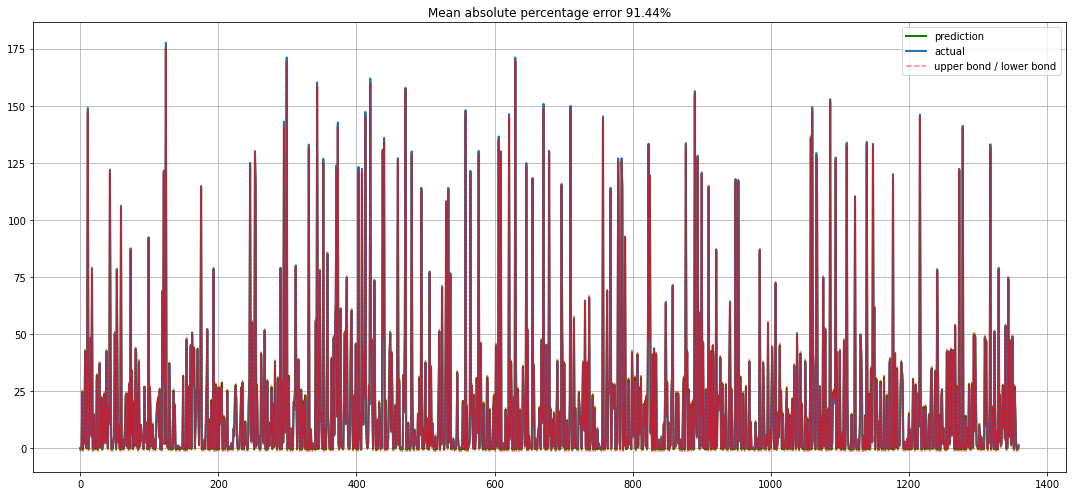

In [115]:
plotModelResults(lin_model, X_train, X_test, plot_intervals=True)

Add weekday and weekend 

Decision tree 

In [116]:
Classifier = DecisionTreeRegressor()

In [117]:
Classifier.fit(X_train,y_train)

DecisionTreeRegressor()

In [118]:
prediction = Classifier.predict(X_test)

In [119]:
dframe = pd.DataFrame(y_test,prediction)

In [120]:
dfr = pd.DataFrame({'Actual Adjusted Close Price': y_test, 'Predicted Adjusted Close Price':prediction})

In [121]:
dfr

,Actual Adjusted Close Price,Predicted Adjusted Close Price
Date,,
1998-04-22,0.210514,0.210820
1995-05-09,0.331960,0.332995
1999-01-11,0.594223,0.606586
2016-03-14,23.728031,23.043575
1996-08-29,0.187549,0.187549
...,...,...
2009-04-22,3.720658,3.721576
1996-09-26,0.171282,0.171282
2003-10-14,0.375863,0.375557


In [122]:
Classifier.score(X_test,y_test)

0.9999191098063906

In [123]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.99 %
Standard Deviation: 0.00 %


In [124]:
import math

In [125]:
import sklearn.metrics as metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, prediction))

Mean Absolute Error: 0.12359090147058827


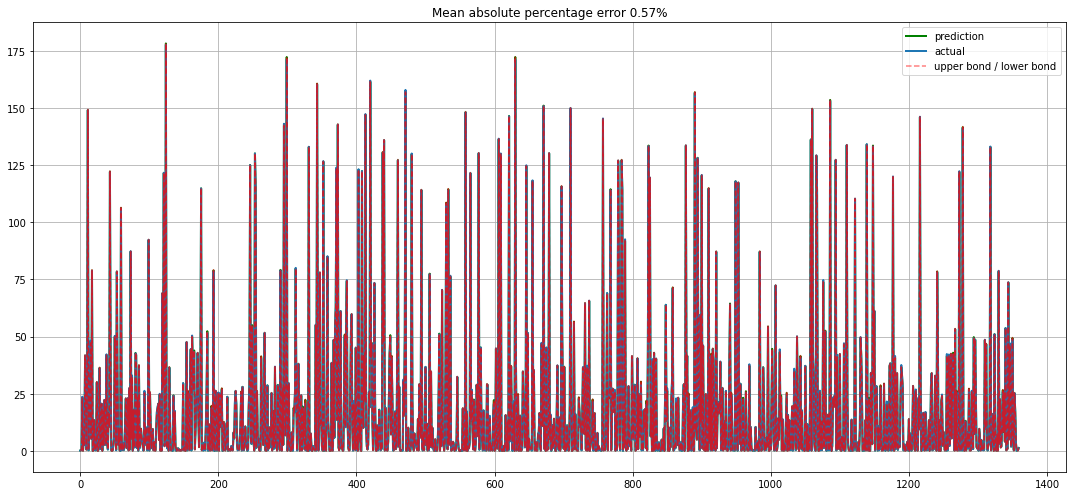

In [126]:
plotModelResults(Classifier, X_train, X_test, plot_intervals=True)
#plotCoefficients(Classifier)